** Assignment 3 **

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator as idm
import numpy as np
import warnings
#Supressing warnings
warnings.filterwarnings('ignore')

In [37]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [52]:
# Creating augmentation on training variable
train_flowers=idm(rescale=1./255,zoom_range=0.2,horizontal_flip=True)

# Passing training data to train variable
Xtrain = train_flowers.flow_from_directory('/content/drive/MyDrive/flower/Train',target_size=(76,76),class_mode='categorical',batch_size=100)

Found 3308 images belonging to 5 classes.


In [55]:
# Creating augmentation on testing variable
test_flowers=idm(rescale=1./255)

# Passing testing data to test variable
Xtest = test_flowers.flow_from_directory('/content/drive/MyDrive/flower/Test',target_size=(76,76),class_mode='categorical',batch_size=100)


Found 573 images belonging to 5 classes.


In [56]:
Flower_model = Sequential()
Flower_model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(76,76,3)))
Flower_model.add(MaxPooling2D(pool_size=(2,2)))
Flower_model.add(Flatten())
Flower_model.add(Dense(300,activation='relu'))
Flower_model.add(Dense(150,activation='relu'))
Flower_model.add(Dense(5,activation='softmax'))

In [57]:
Flower_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [58]:
Flower_model.fit_generator(Xtrain,steps_per_epoch= len (Xtrain),epochs= 8,validation_data=Xtest,validation_steps= len (Xtest))

Epoch 1/8
34/34 [==============================] - 38s 1s/step - loss: 1.7519 - accuracy: 0.3637 - val_loss: 1.3037 - val_accuracy: 0.4503
Epoch 2/8
34/34 [==============================] - 38s 1s/step - loss: 1.1124 - accuracy: 0.5611 - val_loss: 1.2834 - val_accuracy: 0.4695
Epoch 3/8
34/34 [==============================] - 38s 1s/step - loss: 1.0209 - accuracy: 0.6004 - val_loss: 1.1725 - val_accuracy: 0.5323
Epoch 4/8
34/34 [==============================] - 36s 1s/step - loss: 0.9363 - accuracy: 0.6463 - val_loss: 1.1455 - val_accuracy: 0.5445
Epoch 5/8
34/34 [==============================] - 36s 1s/step - loss: 0.8934 - accuracy: 0.6578 - val_loss: 1.1712 - val_accuracy: 0.5689
Epoch 6/8
34/34 [==============================] - 39s 1s/step - loss: 0.8147 - accuracy: 0.6914 - val_loss: 1.1752 - val_accuracy: 0.5480
Epoch 7/8
34/34 [==============================] - 37s 1s/step - loss: 0.7679 - accuracy: 0.7177 - val_loss: 1.2467 - val_accuracy: 0.5497
Epoch 8/8
34/34 [==========

In [59]:
Flower_model.save('Flower.h5')

In [60]:
from tensorflow.keras.preprocessing import image

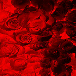

In [61]:
test_img=image.load_img('/content/drive/MyDrive/flower/Train/rose/110472418_87b6a3aa98_m.jpg',target_size=(76,76))
test_img

In [62]:
x=image.img_to_array(test_img)
x=np.expand_dims(x,axis=0)
predicted=np.argmax(Flower_model.predict(x))
Prediction_category=['daisy','dandelion','rose','sunflower','tulip']
Prediction_category[predicted]

'rose'

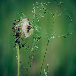

In [70]:
test_img1=image.load_img('/content/drive/MyDrive/flower/Vaidate/dandelion/29556932571_f124d8ac5d_n.jpg',target_size=(76,76))
test_img1

In [71]:
x=image.img_to_array(test_img1)
x=np.expand_dims(x,axis=0)
predicted=np.argmax(Flower_model.predict(x))
Prediction_category[predicted]

'dandelion'

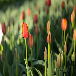

In [73]:
test_img2=image.load_img('/content/drive/MyDrive/flower/Vaidate/tulip/17189526216_fa24dd541a_n.jpg',target_size=(76,76))
test_img2

In [74]:
x=image.img_to_array(test_img2)
x=np.expand_dims(x,axis=0)
predicted=np.argmax(Flower_model.predict(x))
Prediction_category[predicted]

'tulip'